**This notebook explores the specific active ingrdient 'pyrethroid' at it's usage throughout CA school districts**

In [1]:
import sys
from pathlib import Path

sys.path.append(str(Path("../src/utils").resolve()))

import numpy as np
import pandas as pd

from utils import (
    create_CA_visualization,
    demographic_intensity_correlations,
    get_aggregate_results,
    into_gdf,
    top_10_barplot,
    top_n_df,
    trendPlot,
)

In [2]:
# data
schools = pd.read_parquet(str(Path("../data/ca-school.parquet").resolve()))

pyrData = get_aggregate_results(
    "school",
    start_year=2022,
    start_month=1,
    end_year=2022,
    end_month=12,
    ai_categories="PYR",
)

pyrData = pyrData.merge(schools, on="FIPS")
pyrData = into_gdf(pyrData, "geometry")

,Area Name,FIPS,ai_intensity
0,Graves Elementary School District,15870,263.95
1,Santa Maria-Bonita Elementary School District,05580,127.41
2,Allensworth Elementary School District,01980,112.50
3,Spreckels Union Elementary School District,37710,88.59
4,North Monterey County Unified School District,27590,84.52
5,Chualar Union Elementary School District,08580,75.41
6,Buena Vista Elementary School District,06420,59.31
7,Santa Rita Union Elementary School District,35790,54.20
8,Guadalupe Union Elementary School District,16260,52.29
9,Firebaugh-Las Deltas Unified School District,13840,50.18


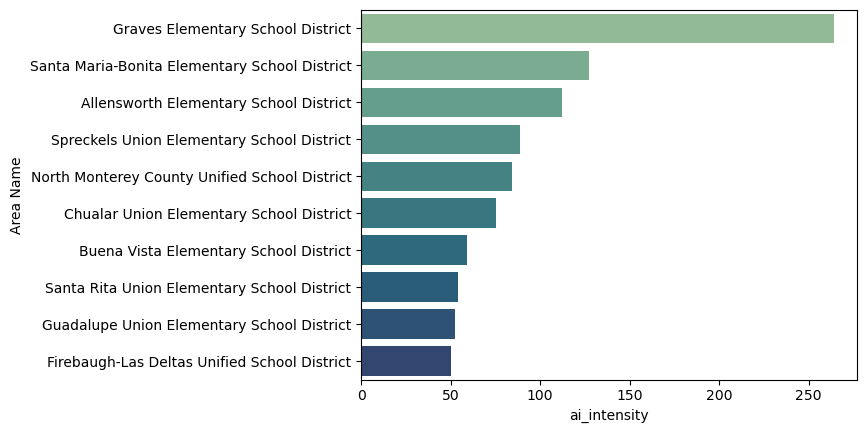

In [3]:
pyr_top_10 = top_n_df(pyrData, "", "ai_intensity", n=10)
display(pyr_top_10)

top_10_barplot(pyr_top_10)

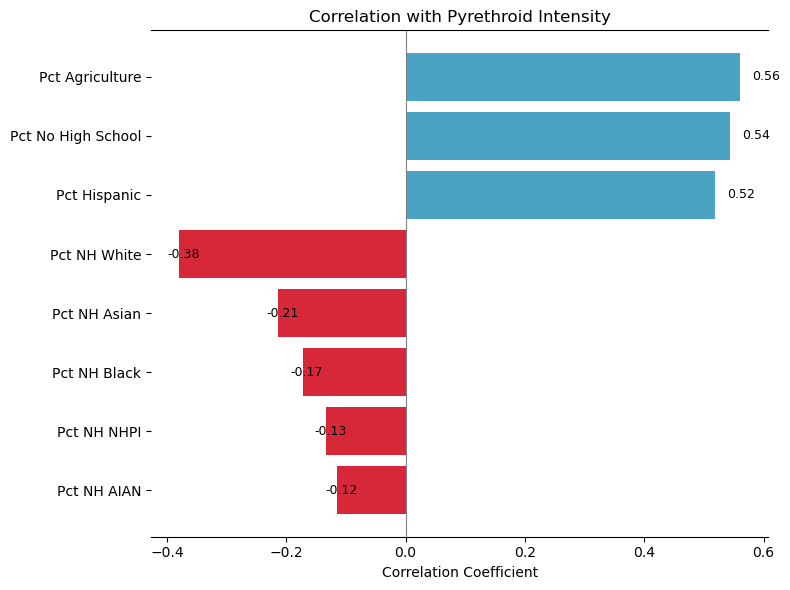

,Pyrethroid Intensity
Pct NH Black,-0.172579
Pct Hispanic,0.518071
Pct NH White,-0.379547
Pct NH Asian,-0.213573
Pct NH AIAN,-0.115203
Pct NH NHPI,-0.133691
Pct No High School,0.543429
Pct Agriculture,0.56069


In [4]:
pyrData["Pyrethroid Intensity"] = np.log1p(pyrData["ai_intensity"])

demographic_intensity_correlations(pyrData, "Pyrethroid Intensity")

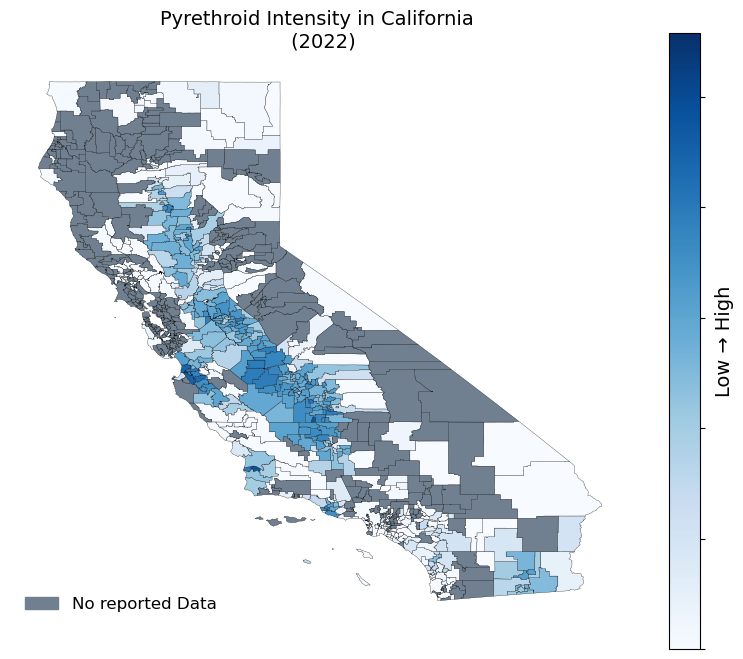

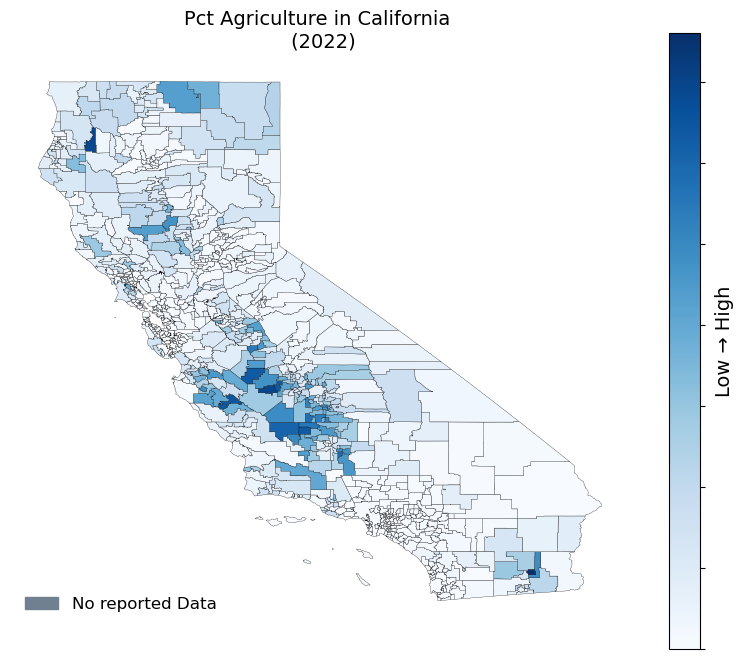

In [5]:
create_CA_visualization(pyrData, "Pyrethroid Intensity", "2022")
create_CA_visualization(pyrData, "Pct Agriculture", "2022")

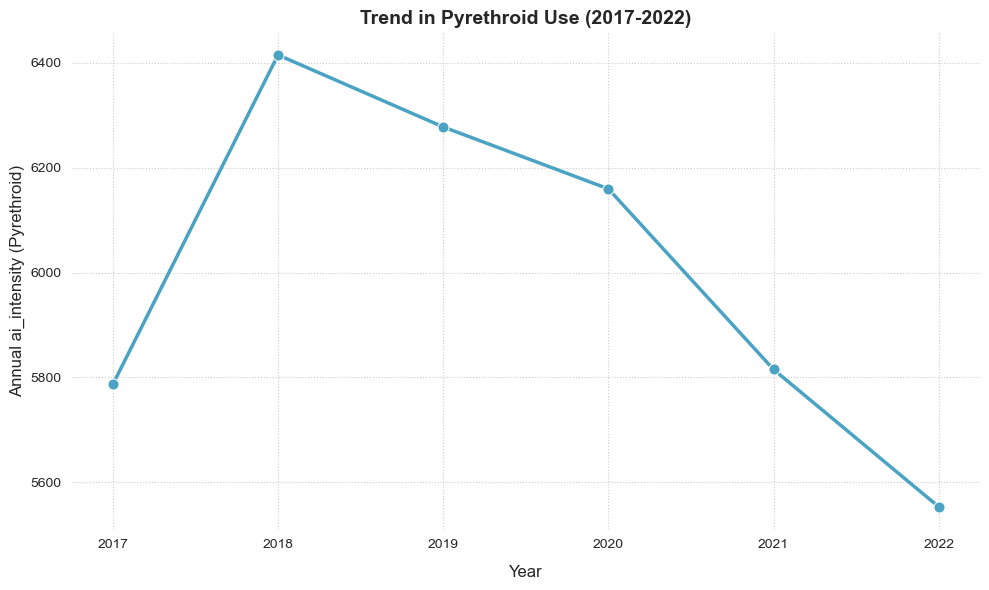

In [6]:
trendPlot("Pyrethroid", [("ai_categories", ["PYR"])])